## Import Modules

In [1]:
import numpy as np
import time
from itertools import accumulate
import matplotlib.pyplot as plt

## Gradient Descent Implementation

In [2]:
class SampleModel:
    """ class for sample model with parameters a,b """
    
    def __init__(self, a=0.5, b=0.5):
        """
        Initialize coefficient and bias

        Inputs:
        - a: coef
        - b: bias
        """
        self.params = {'coef':a, 'bias':b}
        self.losses = []
        self.times = []

    def data_generation(self, true_a, true_b):
        """
        Generate dataset
        """
        self.true_a = true_a
        self.true_b = true_b

        N = 100000

        X = np.random.randn(N)
        random_noise = np.random.randn(N) / 10

        X_modified = X + random_noise

        y = self.true_a*X_modified + self.true_b

        return X, y

    def data_generation_quad(self, true_a, true_b):
        """
        Generate dataset
        """
        self.true_a = true_a
        self.true_b = true_b

        N = 100000

        X = np.random.randn(N)
        random_noise = np.random.randn(N) / 10

        X_modified = X + random_noise

        y = np.power(self.true_a*X_modified + self.true_b, 2)

        return X, y

    def forward(self, X):
        """
        Implement forward pass for the model
        """
        a, b = self.params['coef'], self.params['bias']
        y = a * X + b
        return y

    def backward(self, X, y):
        """
        Computes the gradients for each param in self.params
        @param X: training input data (N,)
        @param y: training output data (N,)
        @return: gradients of parameters
        """
        a, b = self.params['coef'], self.params['bias']

        gradients = {}     ## Loss(L2) = avg((y - (a*X + b))^2)
        gradients['coef'] = np.mean(2*(y - (a*X+b))*(-X))
        gradients['bias']  = np.mean(2*(y - (a*X+b))*(-1))

        return gradients

    def run(self, X, y, train=False, n_epochs=10, lr=0.001, batch_size=None):
        """
        Runs the model with training as an option.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @train: boolean for train
        @n_epochs: number of traninig epochs
        @lr: learning rate
        """
        print("Training Starts...")
        if train:
            if batch_size:
                print("Mini-Batch SGD w Batch Size: {}".format(batch_size))
                self.batch_gradient_descent(X, y, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
            
            else:
                print("Full-Batch GD")
                self.gradient_descent(X, y, n_epochs=n_epochs, lr=lr)

    def gradient_descent(self, X, y, n_epochs=10, lr=0.001):
        """
        Train using batch gradient descent.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @param lr: learning rate
        """
        for epoch in range(n_epochs):
            start = time.time()
            gradients = self.backward(X, y)
            for param in self.params:
                self.params[param] -= lr * gradients[param]

            current_loss = self.compute_loss(X, y)
            end = time.time()
            self.losses.append(current_loss)
            self.times.append(end - start)

            print("========== Epoch {}/{} ==========".format(epoch+1, n_epochs))
            print("Loss > {:.2f}".format(current_loss))
            print("Params > coef: {:.2f} / bias: {:.2f}".format(self.params['coef'], self.params['bias']))
        self.times = list(accumulate(self.times))

    def batch_gradient_descent(self, X, y, n_epochs=10, lr=0.001, batch_size=16):
        """
        Train using batch gradient descent.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @param lr: learning rate
        @param batch_size
        """
        for epoch in range(n_epochs):
            # Prob-(a)
            ## TODO (Start) ##
            start = time.time()
            # Creating mini barches
            mini_batches = []
            data = np.hstack((X.reshape((-1, 1)), y.reshape((-1, 1))))
            np.random.shuffle(data)
            num_batches = data.shape[0] // batch_size

            for i in range(num_batches):
                batch = data[i*batch_size:(i+1)*batch_size, :]
                X_batch = batch[:, 0]
                y_batch = batch[:, 1]
                mini_batches.append((X_batch, y_batch))
            # Take the rest of the data
            if data.shape[0] % batch_size != 0:
                batch = data[batch_size*num_batches+1:, :]
                X_batch = batch[:, 0]
                y_batch = batch[:, 1]
                mini_batches.append((X_batch, y_batch))
            for batch in mini_batches:
                X_batch, y_batch = batch
                gradients = self.backward(X_batch, y_batch)
                
                for param in self.params:
                    self.params[param] -= lr * gradients[param]
            current_loss = self.compute_loss(X, y)
            end = time.time()
            self.losses.append(current_loss)
            self.times.append(end - start)
            ## TODO (End) ##

            print("========== Epoch {}/{} ==========".format(epoch+1, n_epochs))
            print("Loss > {:.2f}".format(current_loss))
            print("Params > coef: {:.2f} / bias: {:.2f}".format(self.params['coef'], self.params['bias']))
        self.times = list(accumulate(self.times))

    def compute_loss(self, X, y):
        """
        Computes the L2 loss of the model given X, y.
        @param X: training input data (N,)
        @param y: training output data (N,)
        @return: loss
        """
        a, b = self.params['coef'], self.params['bias']
        loss = np.mean(np.power(y - (a*X + b), 2))
        return loss
    

## Test Full-Batch GD

In [3]:
model1 = SampleModel(a=0.5, b=0.5)

In [4]:
X, y = model1.data_generation(true_a=20, true_b=5)

## Use below code instead while doing Prob-(c)
# X, y = model.data_generation_quad(true_a=20, true_b=5)

In [5]:
n_epochs, lr = 30, 1e-1

start_time = time.time()

model1.run(X, y, train=True, n_epochs=n_epochs, lr=lr)
loss = model1.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model1.losses[i-1] - model1.losses[i]) / model1.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model1.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model1.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Full-Batch GD
0.005835533142089844
========== Epoch 1/30 ==========
Loss > 261.04
Params > coef: 4.42 / bias: 1.40
0.004138946533203125
========== Epoch 2/30 ==========
Loss > 168.02
Params > coef: 7.56 / bias: 2.12
0.004021883010864258
========== Epoch 3/30 ==========
Loss > 108.67
Params > coef: 10.06 / bias: 2.69
0.0036759376525878906
========== Epoch 4/30 ==========
Loss > 70.79
Params > coef: 12.06 / bias: 3.15
0.0034279823303222656
========== Epoch 5/30 ==========
Loss > 46.62
Params > coef: 13.66 / bias: 3.52
0.003361225128173828
========== Epoch 6/30 ==========
Loss > 31.19
Params > coef: 14.94 / bias: 3.82
0.0030798912048339844
========== Epoch 7/30 ==========
Loss > 21.35
Params > coef: 15.95 / bias: 4.05
0.0030012130737304688
========== Epoch 8/30 ==========
Loss > 15.07
Params > coef: 16.77 / bias: 4.24
0.0022933483123779297
========== Epoch 9/30 ==========
Loss > 11.06
Params > coef: 17.42 / bias: 4.39
0.0028197765350341797
========== Epoch 10/30 =======

## Test SGD

In [6]:
model2 = SampleModel(a=0.5, b=0.5)

In [7]:
X, y = model2.data_generation(true_a=20, true_b=5)

## Use below code instead while doing Prob-(c)
# X, y = model.data_generation_quad(true_a=20, true_b=5)

In [8]:
n_epochs, lr, batch_size = 30, 1e-1, 1

start_time = time.time()

model2.run(X, y, train=True, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
loss = model2.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model2.losses[i-1] - model2.losses[i]) / model2.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model2.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model2.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Mini-Batch SGD w Batch Size: 1
========== Epoch 1/30 ==========
Loss > 4.10
Params > coef: 20.27 / bias: 4.98
========== Epoch 2/30 ==========
Loss > 4.52
Params > coef: 20.09 / bias: 4.31
========== Epoch 3/30 ==========
Loss > 4.44
Params > coef: 20.64 / bias: 4.97
========== Epoch 4/30 ==========
Loss > 6.26
Params > coef: 21.39 / bias: 4.46
========== Epoch 5/30 ==========
Loss > 4.92
Params > coef: 20.65 / bias: 5.69
========== Epoch 6/30 ==========
Loss > 4.36
Params > coef: 20.44 / bias: 5.38
========== Epoch 7/30 ==========
Loss > 4.55
Params > coef: 20.65 / bias: 5.33
========== Epoch 8/30 ==========
Loss > 6.74
Params > coef: 21.35 / bias: 5.96
========== Epoch 9/30 ==========
Loss > 5.43
Params > coef: 19.18 / bias: 5.86
========== Epoch 10/30 ==========
Loss > 4.34
Params > coef: 20.52 / bias: 4.80
========== Epoch 11/30 ==========
Loss > 4.50
Params > coef: 20.03 / bias: 4.32
========== Epoch 12/30 ==========
Loss > 5.49
Params > coef: 19.68 / bias: 6.17

## Test Mini-Batch SGD

In [9]:
model3 = SampleModel(a=0.5, b=0.5)

In [10]:
X, y = model3.data_generation(true_a=20, true_b=5)

## Use below code instead while doing Prob-(c)
# X, y = model.data_generation_quad(true_a=20, true_b=5)

In [11]:
n_epochs, lr, batch_size = 30, 1e-1, 1000

start_time = time.time()

model3.run(X, y, train=True, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
loss = model3.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model3.losses[i-1] - model3.losses[i]) / model3.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model3.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model3.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Mini-Batch SGD w Batch Size: 1000
========== Epoch 1/30 ==========
Loss > 4.01
Params > coef: 20.00 / bias: 4.98
========== Epoch 2/30 ==========
Loss > 4.01
Params > coef: 19.99 / bias: 4.98
========== Epoch 3/30 ==========
Loss > 4.01
Params > coef: 20.00 / bias: 5.02
========== Epoch 4/30 ==========
Loss > 4.01
Params > coef: 20.00 / bias: 5.01
========== Epoch 5/30 ==========
Loss > 4.01
Params > coef: 20.02 / bias: 5.02
========== Epoch 6/30 ==========
Loss > 4.02
Params > coef: 20.02 / bias: 4.96
========== Epoch 7/30 ==========
Loss > 4.01
Params > coef: 20.02 / bias: 5.01
========== Epoch 8/30 ==========
Loss > 4.01
Params > coef: 19.98 / bias: 5.00
========== Epoch 9/30 ==========
Loss > 4.01
Params > coef: 19.99 / bias: 5.01
========== Epoch 10/30 ==========
Loss > 4.02
Params > coef: 20.03 / bias: 5.02
========== Epoch 11/30 ==========
Loss > 4.02
Params > coef: 19.96 / bias: 5.01
========== Epoch 12/30 ==========
Loss > 4.01
Params > coef: 20.00 / bias: 5

## Result (b)

Performance test on Full-Batch GD, SGD, and Mini-Batch SGD is as follows. I conducted 5 times since SGD showed highly variable time spent.

|                | Exp. 1 |        |          | Exp. 2 |        |          | Exp. 3 |         |          | Exp. 4 |         |          | Exp. 5 |         |          |
|----------------|--------|--------|----------|--------|--------|----------|--------|---------|----------|--------|---------|----------|--------|---------|----------|
|                | Epoch  | Loss   | Time (s) | Epoch  | Loss   | Time (s) | Epoch  | Loss    | Time (s) | Epoch  | Loss    | Time (s) | Epoch  | Loss    | Time (s) |
| Full-Batch GD  | 19     | 4.083  | 0.08556  | 19     | 4.096  | 0.08066  | 19     | 4.08091 | 0.07246  | 19     | 4.07492 | 0.08083  | 19     | 4.09458 | 0.07751  |
| SGD            | 7      | 4.1799 | 19.90088 | 24     | 4.2182 | 63.14866 | 5      | 4.19507 | 14.96709 | 16     | 4.60039 | 42.22355 | 11     | 4.13942 | 29.87885 |
| Mini-Batch SGD | 1      | 3.9988 | 0.19164  | 1      | 3.9777 | 0.19326  | 1      | 3.97752 | 0.20482  | 1      | 3.98444 | 0.18896  | 1      | 4.00456 | 0.19578  |

![Chart1](https://raw.githubusercontent.com/WhiteNoize-SNU/datasciencehw6/main/figure/Chart1.png)

### Time
Full-Batch GD spent the most less time for every experiment, followed by Mini-Batch SGD. Normal SGD spent the most time, about dozens ~ hundreds times compared to Full-Batch GD. It is because SGD considers every random error included in data, interrupts parameters from converging to accurate answer.

### Loss
Final losses are similar among GD methods. SGD showed the highest loss and Mini-Batch SGD did the lowest loss.



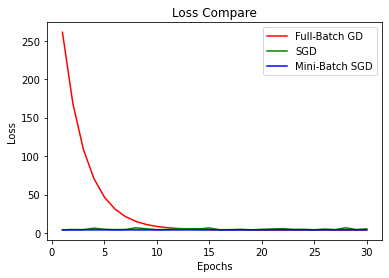

In [12]:
epochs = range(1, 31)
plt.plot(epochs, model1.losses, 'r-')
plt.plot(epochs, model2.losses, 'g-')
plt.plot(epochs, model3.losses, 'b-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Compare')

plt.legend(['Full-Batch GD', 'SGD', 'Mini-Batch SGD'])
plt.show()

## Result (c)

### Full-Batch GD

In [13]:
model4 = SampleModel(a=0.5, b=0.5)
X, y = model4.data_generation_quad(true_a=20, true_b=5)

n_epochs, lr = 30, 1e-1

start_time = time.time()

model4.run(X, y, train=True, n_epochs=n_epochs, lr=lr)
loss = model4.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model4.losses[i-1] - model4.losses[i]) / model4.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model4.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model4.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Full-Batch GD
0.0031189918518066406
========== Epoch 1/30 ==========
Loss > 468873.46
Params > coef: 41.19 / bias: 85.79
0.0029060840606689453
========== Epoch 2/30 ==========
Loss > 417402.70
Params > coef: 73.79 / bias: 154.03
0.0030107498168945312
========== Epoch 3/30 ==========
Loss > 384447.11
Params > coef: 99.90 / bias: 208.61
0.0029625892639160156
========== Epoch 4/30 ==========
Loss > 363346.35
Params > coef: 120.82 / bias: 252.28
0.002840757369995117
========== Epoch 5/30 ==========
Loss > 349835.97
Params > coef: 137.58 / bias: 287.21
0.0027065277099609375
========== Epoch 6/30 ==========
Loss > 341185.55
Params > coef: 151.00 / bias: 315.16
0.0027968883514404297
========== Epoch 7/30 ==========
Loss > 335646.85
Params > coef: 161.75 / bias: 337.51
0.002763986587524414
========== Epoch 8/30 ==========
Loss > 332100.52
Params > coef: 170.36 / bias: 355.40
0.0026383399963378906
========== Epoch 9/30 ==========
Loss > 329829.87
Params > coef: 177.26 / bias:

### SGD

In [14]:
model5 = SampleModel(a=0.5, b=0.5)
X, y = model5.data_generation_quad(true_a=20, true_b=5)

n_epochs, lr, batch_size = 30, 1e-1, 1

start_time = time.time()

model5.run(X, y, train=True, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
loss = model5.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model5.losses[i-1] - model5.losses[i]) / model5.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model5.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model5.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Mini-Batch SGD w Batch Size: 1
========== Epoch 1/30 ==========
Loss > 353114.97
Params > coef: 79.96 / bias: 335.96
========== Epoch 2/30 ==========
Loss > 480888.20
Params > coef: -89.10 / bias: 691.23
========== Epoch 3/30 ==========
Loss > 349887.83
Params > coef: 89.81 / bias: 341.28
========== Epoch 4/30 ==========
Loss > 412065.44
Params > coef: 39.32 / bias: 667.87
========== Epoch 5/30 ==========
Loss > 368811.99
Params > coef: 55.59 / bias: 295.40
========== Epoch 6/30 ==========
Loss > 354220.37
Params > coef: 213.66 / bias: 274.92
========== Epoch 7/30 ==========
Loss > 351021.68
Params > coef: 57.32 / bias: 459.40
========== Epoch 8/30 ==========
Loss > 344566.83
Params > coef: 268.72 / bias: 331.55
========== Epoch 9/30 ==========
Loss > 2016790.19
Params > coef: 1440.80 / bias: 46.85
========== Epoch 10/30 ==========
Loss > 1409372.14
Params > coef: -818.18 / bias: 643.53
========== Epoch 11/30 ==========
Loss > 462060.16
Params > coef: 405.24 / bias: 

### Mini-Batch SGD

In [15]:
model6 = SampleModel(a=0.5, b=0.5)
X, y = model6.data_generation_quad(true_a=20, true_b=5)

n_epochs, lr, batch_size = 30, 1e-1, 1000

start_time = time.time()

model6.run(X, y, train=True, n_epochs=n_epochs, lr=lr, batch_size=batch_size)
loss = model6.compute_loss(X, y)

end_time = time.time()

# Time spent to converge
for i in range(1, n_epochs):
    loss_difference_rate = np.abs((model6.losses[i-1] - model6.losses[i]) / model6.losses[i-1] * 100)

    if loss_difference_rate < 1:
        print("Time spent for model loss to be converged : {:.5f} sec".format(model6.times[i]))
        print("Total epoch : {}".format(i))
        print("Loss: {}".format(model6.losses[i-1]))
        break

print("Training Ends...")
print()
print("Trained with {} epochs, {} learning rate".format(n_epochs, lr))
print("Time Cost: {:.5f} sec".format(end_time-start_time))

Training Starts...
Mini-Batch SGD w Batch Size: 1000
========== Epoch 1/30 ==========
Loss > 330024.78
Params > coef: 204.99 / bias: 431.16
========== Epoch 2/30 ==========
Loss > 330166.11
Params > coef: 191.75 / bias: 435.71
========== Epoch 3/30 ==========
Loss > 330149.85
Params > coef: 211.86 / bias: 423.48
========== Epoch 4/30 ==========
Loss > 330239.60
Params > coef: 193.91 / bias: 442.35
========== Epoch 5/30 ==========
Loss > 330073.30
Params > coef: 209.97 / bias: 429.37
========== Epoch 6/30 ==========
Loss > 330020.19
Params > coef: 203.95 / bias: 430.55
========== Epoch 7/30 ==========
Loss > 330163.20
Params > coef: 214.53 / bias: 431.80
========== Epoch 8/30 ==========
Loss > 330022.03
Params > coef: 203.61 / bias: 428.62
========== Epoch 9/30 ==========
Loss > 331319.30
Params > coef: 168.38 / bias: 441.56
========== Epoch 10/30 ==========
Loss > 330067.68
Params > coef: 197.72 / bias: 435.32
========== Epoch 11/30 ==========
Loss > 330231.86
Params > coef: 190.89 / b

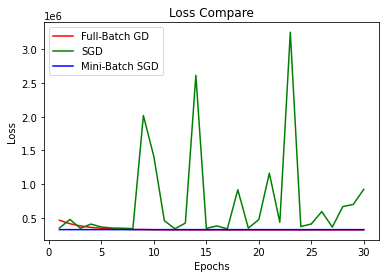

In [16]:
epochs = range(1, 31)
plt.plot(epochs, model4.losses, 'r-')
plt.plot(epochs, model5.losses, 'g-')
plt.plot(epochs, model6.losses, 'b-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Compare')

plt.legend(['Full-Batch GD', 'SGD', 'Mini-Batch SGD'])
plt.show()

As we try to change dataset to $y = (ax + b)^2$, our hypothesis $y = ax + b$ causes model error, getting the loss much larger than experiment (b). Yet, we still can find that **Full-Batch SGD** and **Mini-BAtch SGD** seems to make loss converge to some constant. It's bacuase those methods use bunch of data, make train process to ignore some error since we use *mean* function to calculate loss. On the other hand, normal **SGD** utilize every individual data point to train process, and the accumulated error causes loss to show some unstable aspect. If we plot each loss seperately, we also find that Mini-Batch SGD's loss behave in the similar manner. As a result, we can conclude that using batch has potential to improve parameter accurately but also has possibility to make optimization algorithm a little bit unstable.

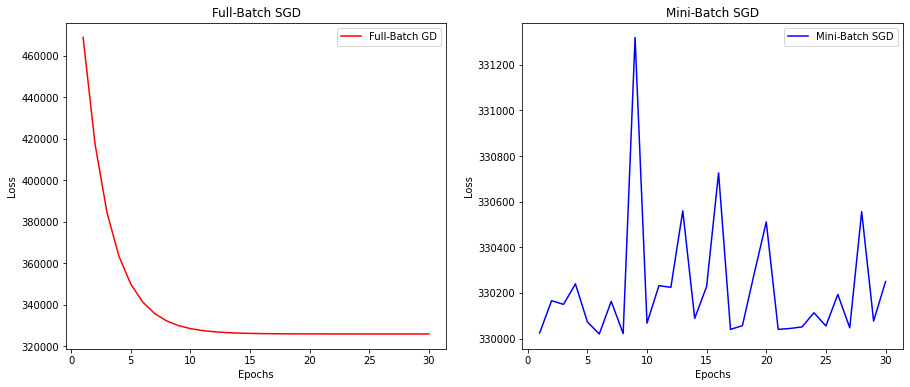

In [21]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, model4.losses, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Full-Batch SGD')
plt.legend(['Full-Batch GD'])

plt.subplot(1, 2, 2)
plt.plot(epochs, model6.losses, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Mini-Batch SGD')
plt.legend(['Mini-Batch SGD'])

## Reference & Source

- Matplotlib Plotting : [Matplotlib Subplot Document](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
- [Markdown Table Generator](https://www.tablesgenerator.com/markdown_tables)
- Figure source : Stored in my [Github](https://github.com/WhiteNoize-SNU/datasciencehw6/tree/main/figure)